<a href="https://colab.research.google.com/github/AyushSonuu/play-store-app-review-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/capstone-project-EDA/Copy of Play Store Data.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.shape

(10841, 13)

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


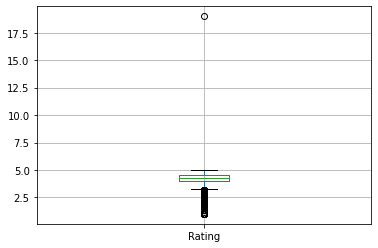

In [7]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf64632910>]],
      dtype=object)

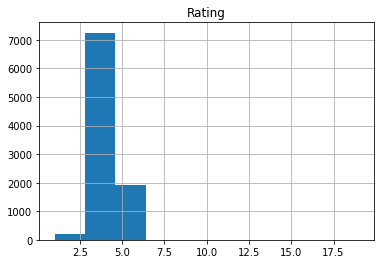

In [8]:
df.hist()

Data cleaning 

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
#deali9ng with outliers 
# as ratings could not be greater than 5
df[df["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df.drop([10472],inplace = True)

In [12]:
# df[10471:10475]

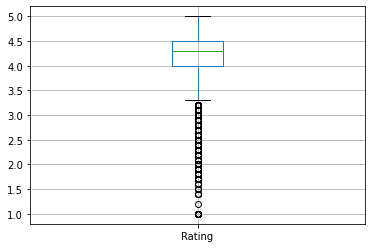

In [13]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf64093750>]],
      dtype=object)

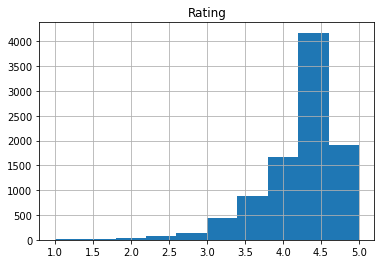

In [14]:
df.hist()

In [15]:
# removing columns which are 95 % empty
a = len(df)*0.05
a

542.0

In [16]:
df.dropna(thresh = a , axis = 1,inplace=True)

In [17]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [18]:
# handling null values
df["Rating"].fillna((df["Rating"].median()),inplace=True)

In [19]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [20]:
df["Type"].fillna(str(df["Type"].mode().values[0]),inplace=True)

In [21]:
df["Current Ver"].fillna(str(df["Current Ver"].mode().values[0]),inplace =True)

In [22]:
df["Android Ver"].fillna(str(df["Android Ver"].mode().values[0]),inplace = True)

In [23]:
df.drop_duplicates(subset=["App"],inplace=True)

In [24]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
# as we can see that we have done all the data cleaning stuff

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [27]:
df["Price"]=df["Price"].apply((lambda x:str(x).replace("$","")if "$" in str(x)else str(x)))

In [28]:
df["Price"]=df["Price"].apply((lambda x:float(x)))

In [29]:
df["Reviews"]=pd.to_numeric(df["Reviews"],errors="coerce")

In [30]:
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 9659, dtype: int64

In [31]:
(df.Installs)

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 9659, dtype: object

In [32]:
df["Installs"]=df["Installs"].apply((lambda x:str(x).replace("+","")if "+" in str(x)else str(x)))
df["Installs"]=df["Installs"].apply((lambda x:str(x).replace(",","")if "," in str(x)else str(x)))
df["Installs"]=df["Installs"].apply((lambda x:float(x)))

In [33]:
set(df.Installs)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [35]:
df.head()
# df["Genres"].value_counts()
# df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
def fsize(s):
  try:
    if s.endswith("M"):
      return float(s[:-1])
    elif s.endswith("K"):
      return float(s[:-1])/1024
    elif s == "1,000+":
      return 1.0
    else:
      return np.nan
  except:
    return np.nan

In [37]:
df["Size"]=df["Size"].apply((fsize))

In [38]:
df["Size"].fillna(int(df["Size"].mean()),inplace=True)

In [39]:
df.Type.value_counts()


Free    8903
Paid     756
Name: Type, dtype: int64

In [40]:
df["Content Rating"].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [41]:
# df["Android Ver"].value_counts()
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [42]:
df.drop(['Last Updated', 'Current Ver'],axis = 1 , inplace=True)

In [43]:
#most expensive app 
price = df["Price"].max()
df[df["Price"] == price]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,4.1 and up


In [44]:
# category having most number of apps
df["Category"].value_counts().index[0]

'FAMILY'

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Android Ver     9659 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 905.5+ KB


In [46]:
#let us deal with the other data set anf firstly ckean it for further usage
df1 = pd.read_csv("/content/drive/MyDrive/capstone-project-EDA/Copy of User Reviews.csv")
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [47]:
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [48]:
df1.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   App                     64295 non-null  bool 
 1   Translated_Review       64295 non-null  bool 
 2   Sentiment               64295 non-null  bool 
 3   Sentiment_Polarity      64295 non-null  bool 
 4   Sentiment_Subjectivity  64295 non-null  bool 
dtypes: bool(5)
memory usage: 314.1 KB


In [49]:
# droping those rows whose 4 columns are empty
df1.dropna(thresh =4 ,axis=0 , inplace=True)

In [50]:
df1.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [51]:
drop_data=df1[df1["Translated_Review"].isnull() ]
b=list(drop_data.index)

In [52]:
df1.drop(b,inplace=True)

In [53]:
# cleaning the data is done now
df1.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Android Ver     9659 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 905.5+ KB


**Data visualization**

In [56]:
x=df.groupby("Category")["Installs"].sum()
plt.rcParams["figure.figsize"]=(15,8)


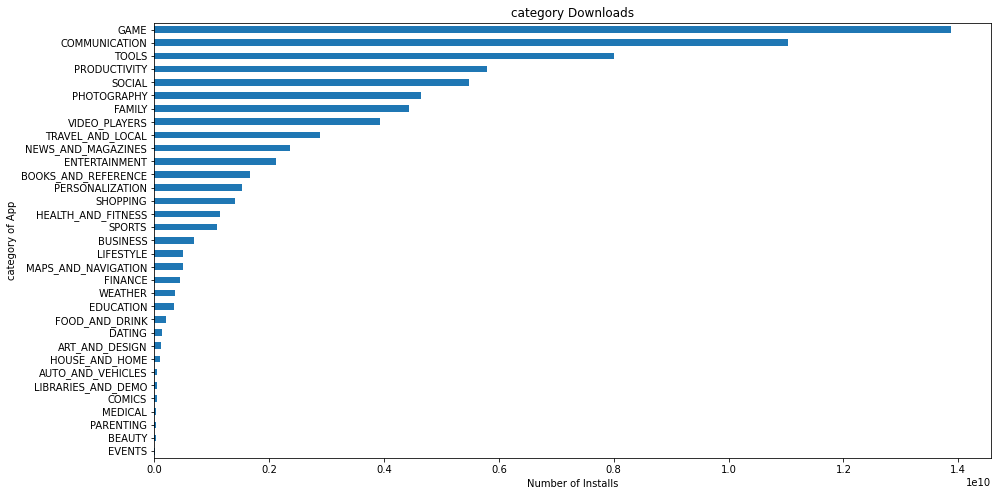

In [57]:
x.sort_values().plot(kind="barh")
# plt.bar(x.index,x.values)
plt.title("category Downloads")
plt.xlabel("Number of Installs")
plt.ylabel("category of App")
plt.show()

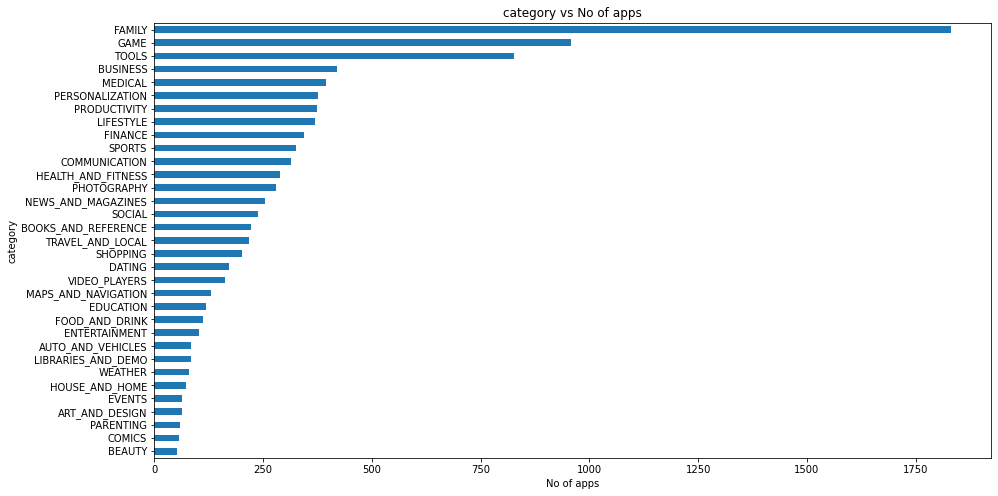

In [58]:
y = df.groupby("Category")["App"].count().sort_values()
y.plot(kind = "barh")
plt.title("category vs No of apps")
plt.xlabel("No of apps")
plt.ylabel("category")
plt.show()

In [59]:
df_lst =[]
for j in df["Category"].unique():
   if "GAME" in j:
     df_lst.append(df[df["Category"]==j])


In [60]:
_df= pd.DataFrame()
games_df=pd.concat([df_lst[0],_df])
games_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67.0,1.000000e+08,Free,0.0,Everyone 10+,Adventure;Action & Adventure,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74.0,5.000000e+08,Free,0.0,Everyone,Casual,4.1 and up
1656,Solitaire,GAME,4.7,254258,23.0,1.000000e+07,Free,0.0,Everyone,Card,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46.0,1.000000e+07,Free,0.0,Everyone,Casual,4.0.3 and up


In [61]:
games_comp = games_df.groupby("Genres")["Installs"].sum()
games_comp.head()

Genres
Action                          3.483039e+09
Action;Action & Adventure       2.500000e+07
Adventure                       2.966953e+08
Adventure;Action & Adventure    1.000000e+08
Arcade                          3.755129e+09
Name: Installs, dtype: float64

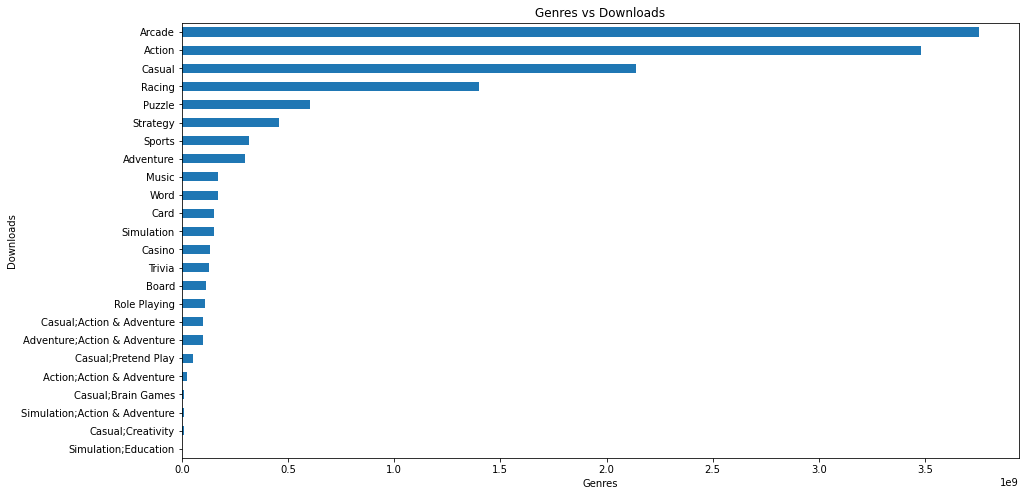

In [89]:
games_comp.sort_values().plot(kind="barh")
plt.title("Genres vs Downloads")
plt.xlabel("Genres")
plt.ylabel("Downloads")
plt.show()

In [63]:
games_type=games_df.groupby("Genres")["Type"].value_counts().unstack().fillna(0)
games_type.head()

Type,Free,Paid
Genres,,
Action,275.0,24.0
Action;Action & Adventure,3.0,0.0
Adventure,61.0,12.0
Adventure;Action & Adventure,1.0,0.0
Arcade,164.0,20.0


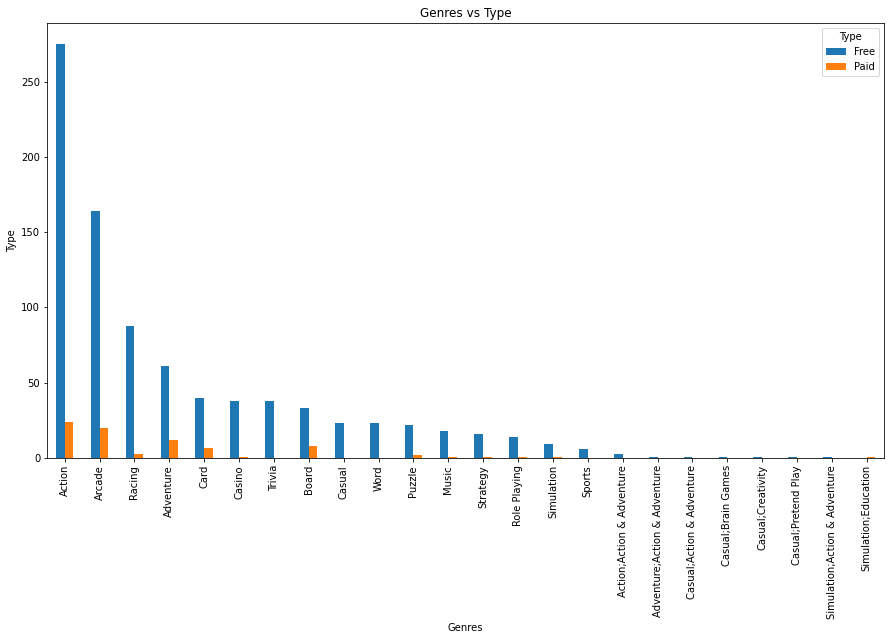

In [95]:
games_type.sort_values(["Free", "Paid"],ascending=False).plot(kind="bar")
plt.title("Genres vs Type")
plt.xlabel("Genres")
plt.ylabel("Type")
plt.show()

In [65]:
games_price=games_df.groupby("Genres")["Price"].max()
games_price.head()


Genres
Action                          16.99
Action;Action & Adventure        0.00
Adventure                        6.99
Adventure;Action & Adventure     0.00
Arcade                          17.99
Name: Price, dtype: float64

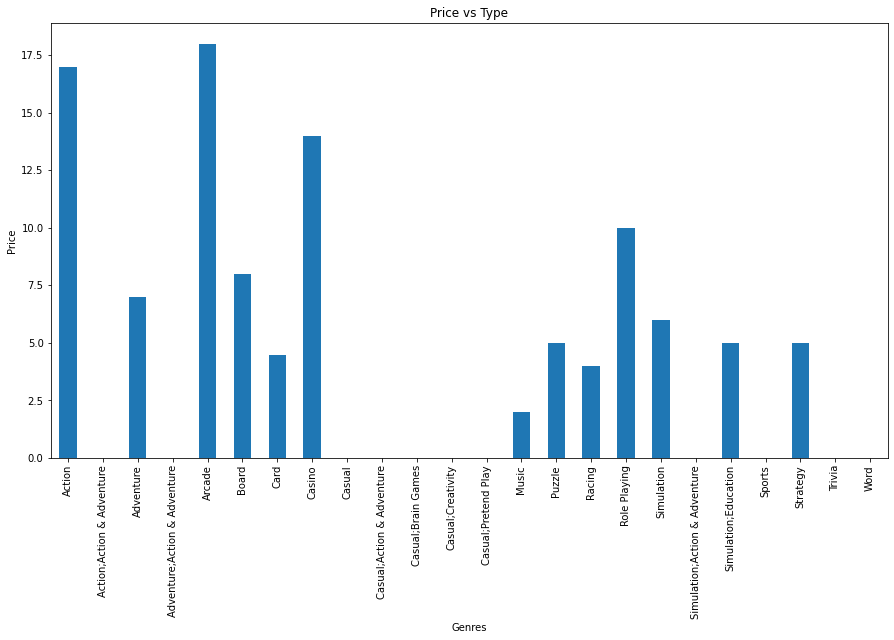

In [66]:
games_price.plot(kind="bar")
plt.title("Price vs Type")
plt.xlabel("Genres")
plt.ylabel("Price")
plt.show()

In [67]:
df_communication_lst =[]
for j in df["Category"].unique():
   if "COMMUNICATION" in j:
     df_communication_lst.append(df[df["Category"]==j])
_df= pd.DataFrame()
games_df=pd.concat([df_communication_lst[0],_df])
games_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21.0,1.000000e+09,Free,0.0,Everyone,Communication,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21.0,1.000000e+09,Free,0.0,Everyone,Communication,Varies with device
337,Messenger for SMS,COMMUNICATION,4.3,125257,17.0,1.000000e+07,Free,0.0,Teen,Communication,4.1 and up
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,21.0,1.000000e+09,Free,0.0,Everyone,Communication,Varies with device
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,21.0,1.000000e+08,Free,0.0,Everyone,Communication,2.3 and up


In [68]:
comm_comp = games_df.groupby("Content Rating")["Installs"].sum()
comm_comp.head(8)

Content Rating
Everyone      1.002355e+10
Mature 17+    1.801100e+08
Teen          8.346166e+08
Name: Installs, dtype: float64

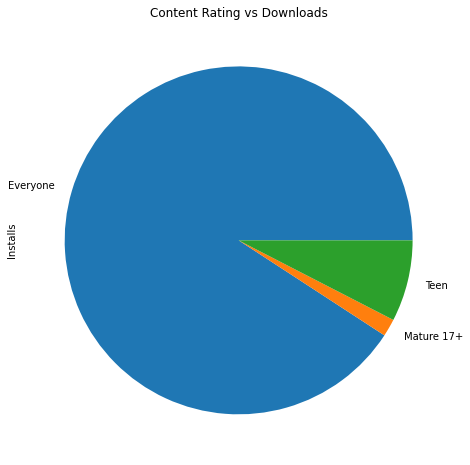

In [88]:
comm_comp.plot(kind="pie")
plt.title("Content Rating vs Downloads")

plt.show()

In [70]:

df_social =[]
for j in df["Category"].unique():
   if "SOCIAL" in j:
     df_social.append(df[df["Category"]==j])
_df= pd.DataFrame()
social_df=pd.concat([df_social[0],_df])
social_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,21.0,1.000000e+09,Free,0.0,Teen,Social,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,21.0,1.000000e+09,Free,0.0,Teen,Social,Varies with device
2546,Facebook Lite,SOCIAL,4.3,8606259,21.0,5.000000e+08,Free,0.0,Teen,Social,Varies with device
2547,"Messages, Text and Video Chat for Messenger",SOCIAL,4.4,49173,4.0,1.000000e+07,Free,0.0,Everyone,Social,4.1 and up
2548,Tumblr,SOCIAL,4.4,2955326,21.0,1.000000e+08,Free,0.0,Mature 17+,Social,Varies with device


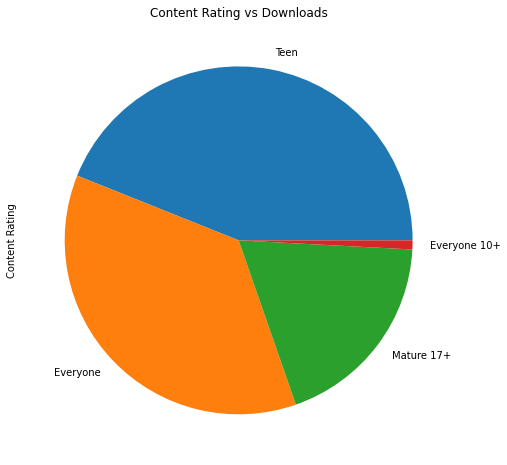

In [71]:
social_df["Content Rating"].value_counts().plot(kind="pie")
plt.title("Content Rating vs Downloads")
plt.show()

In [72]:
df_family =[]
for j in df["Category"].unique():
   if "FAMILY" in j:
     df_family.append(df[df["Category"]==j])
_df= pd.DataFrame()
family_df=pd.concat([df_family[0],_df])
family_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19.0,1000000.0,Free,0.0,Everyone,Casual;Brain Games,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51.0,5000000.0,Free,0.0,Everyone,Educational;Creativity,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22.0,5000000.0,Free,0.0,Everyone,Puzzle;Brain Games,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46.0,1000000.0,Free,0.0,Everyone,Educational;Education,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21.0,1000000.0,Free,0.0,Everyone,Casual;Brain Games,4.0.3 and up


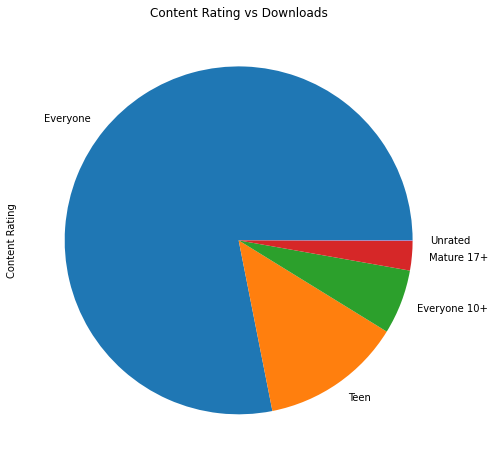

In [73]:
# family_ap = family_df.groupby("App")["Installs"].sum()
family_df["Content Rating"].value_counts().plot(kind="pie")
plt.title("Content Rating vs Downloads")
plt.show()

In [74]:
#apps on revenue
def rev(price,installs):
  rev = price*installs
  return rev


In [75]:
profitable_df = df[df["Type"]=="Paid"].reset_index()
profitable_df["profit"]=profitable_df.apply(lambda x :rev(x["Price"],x["Installs"]),axis=1)
profitable_df.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,profit
0,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000.0,Paid,4.99,Everyone,Business,4.0 and up,499000.0
1,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000.0,Paid,4.99,Everyone,Business,3.0 and up,499000.0
2,427,Puffin Browser Pro,COMMUNICATION,4.0,18247,21.0,100000.0,Paid,3.99,Everyone,Communication,4.1 and up,399000.0
3,476,"Moco+ - Chat, Meet People",DATING,4.2,1545,21.0,10000.0,Paid,3.99,Mature 17+,Dating,4.1 and up,39900.0
4,477,Calculator,DATING,2.6,57,6.2,1000.0,Paid,6.99,Everyone,Dating,4.0 and up,6990.0


Text(0.5, 0, 'category of app')

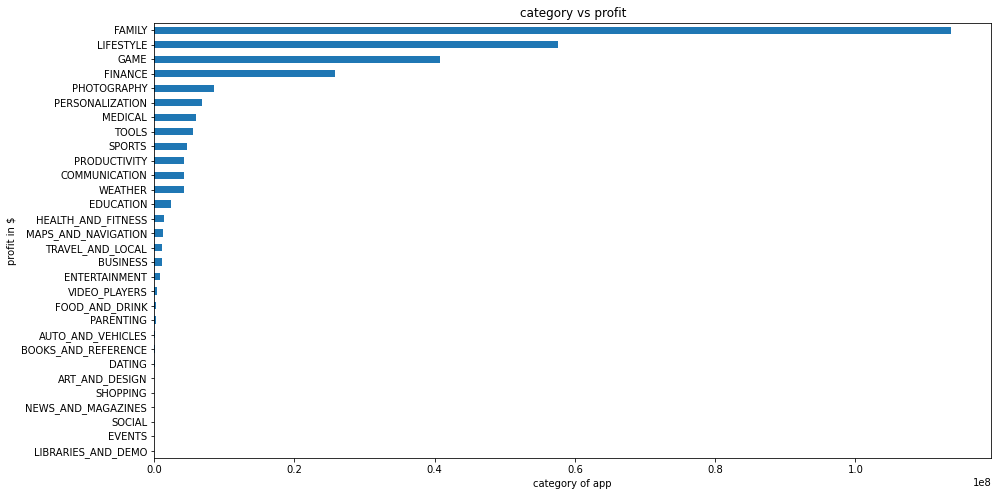

In [76]:
profitable_df.groupby("Category")["profit"].sum().sort_values().plot(kind="barh")
plt.title("category vs profit")
plt.ylabel("profit in $")
plt.xlabel("category of app")



In [77]:
error_values_to_drop = profitable_df[profitable_df["profit"]==0]


In [78]:
profitable_df.drop(error_values_to_drop.index,inplace=True)

In [79]:
top_10 = profitable_df.sort_values(["profit"],ascending=False).head(10)
# top_10.drop_duplicates(subset=["App"],inplace=True)
top_10_profitable_apps = top_10.set_index("App")

top_10_profitable_apps.drop("index",axis=1,inplace = True)


In [80]:
top_10_profitable_apps.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver,profit
App,,,,,,,,,,,
Minecraft,FAMILY,4.5,2376564,21.0,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,Varies with device,69900000.0
I am rich,LIFESTYLE,3.8,3547,1.8,100000.0,Paid,399.99,Everyone,Lifestyle,4.0.3 and up,39999000.0
I Am Rich Premium,FINANCE,4.1,1867,4.7,50000.0,Paid,399.99,Everyone,Finance,4.0 and up,19999500.0
Hitman Sniper,GAME,4.6,408292,29.0,10000000.0,Paid,0.99,Mature 17+,Action,4.1 and up,9900000.0
Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000.0,Paid,6.99,Mature 17+,Action,3.0 and up,6990000.0


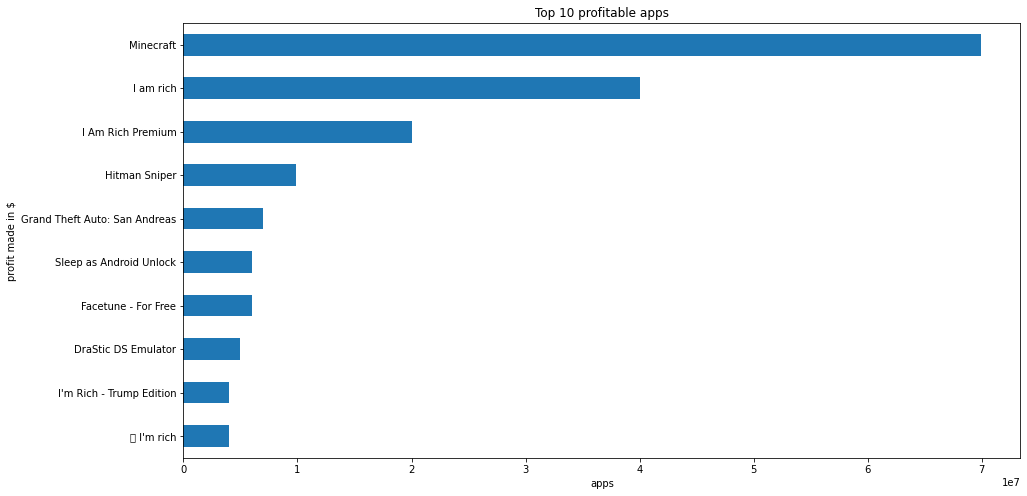

In [87]:
top_10_profitable_apps.groupby("App")["profit"].max().sort_values().plot(kind="barh")

plt.title("Top 10 profitable apps")
plt.xlabel("apps")
plt.ylabel("profit made in $")
plt.show()